In [7]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [8]:
Public_Transport = "Resources/Public_Transport.csv"
Public_Transport_df = pd.read_csv(Public_Transport, encoding="ISO-8859-1")

Demographics = "Resources/Demographics.csv"
Demographics_df = pd.read_csv(Demographics, encoding="ISO-8859-1")

In [3]:
Public_Transport_df["Type"].unique()

array(['Total', 'Bus', 'Ferry', 'Train_Total', 'Armadale', 'Fremantle',
       'Joondalup', 'Mandurah', 'Midland'], dtype=object)

In [148]:
Bus_df = Public_Transport_df[Public_Transport_df["Type"]=="Bus"].sort_index(ascending=False)
Train_df = Public_Transport_df[Public_Transport_df["Type"]=="Train_Total"].sort_index(ascending=False)

Date = Bus_df["Year"].reset_index(drop=True)
Bus_Total = Bus_df["Total"].reset_index(drop=True)
Train_Total = Train_df["Total"].reset_index(drop=True)

Bus_Train = pd.DataFrame({"Date":Date,
    "Bus_Total": Bus_Total,
    "Train_Total": Train_Total})

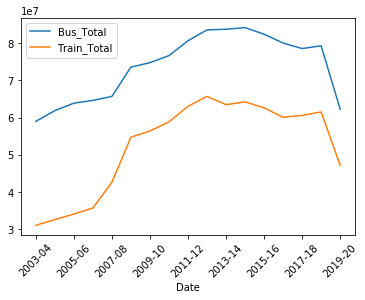

In [158]:
#Remove Last Year? 
#Show population growth in overall Perth here noticing it's not going hand in hand, possibly need to represent this is better to change units to % difference
Bus_Train.plot(x="Date",y=["Bus_Total","Train_Total"],rot=45)

In [175]:
#Formulas too repetitive, someone to loop this around?


Armadale_df = Public_Transport_df[Public_Transport_df["Type"]=="Armadale"].sort_index(ascending=False)
Joondalup_df = Public_Transport_df[Public_Transport_df["Type"]=="Joondalup"].sort_index(ascending=False)
Midland_df = Public_Transport_df[Public_Transport_df["Type"]=="Midland"].sort_index(ascending=False)
Mandurah_df = Public_Transport_df[Public_Transport_df["Type"]=="Mandurah"].sort_index(ascending=False)
Fremantle_df = Public_Transport_df[Public_Transport_df["Type"]=="Fremantle"].sort_index(ascending=False)


Date = Armadale_df["Year"].reset_index(drop=True)
Armadale_Total = Armadale_df["Total"].reset_index(drop=True)
Joondalup_Total = Joondalup_df["Total"].reset_index(drop=True)
Midland_Total = Midland_df["Total"].reset_index(drop=True)
Mandurah_Total = Mandurah_df["Total"].reset_index(drop=True)
Fremantle_Total = Fremantle_df["Total"].reset_index(drop=True)


LGA_Total = pd.DataFrame({"Date":Date,
    "Armadale_Total": Armadale_Total,
    "Joondalup_Total": Joondalup_Total,
    "Midland_Total": Midland_Total,
    "Mandurah_Total": Mandurah_Total,
    "Fremantle_Total": Fremantle_Total})

LGA_Total


,Date,Armadale_Total,Joondalup_Total,Midland_Total,Mandurah_Total,Fremantle_Total
0,2010-11,8838049,15611836,6319788,18519864,8198224
1,2011-12,9227813,16700234,6626464,20293223,8679139
2,2012-13,9667987,17449891,6688843,21150408,8866211
3,2013-14,9176434,16897361,6646213,20663690,8284716
4,2014-15,9066797,17105797,6661434,20699900,8228255
5,2015-16,8508290,16917029,6437107,20595401,8244599
6,2016-17,7385888,16658559,6143986,20343828,7940853
7,2017-18,7735572,16477387,5784146,20545716,7694437
8,2018-19,7983379,16531788,5994370,20900819,7476804
9,2019-20,6288594,12686976,4746411,16041183,5869980


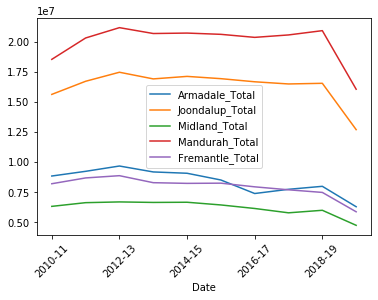

In [176]:
LGA_Total.plot(x="Date",y=["Armadale_Total","Joondalup_Total","Midland_Total","Mandurah_Total","Fremantle_Total"],rot=45)

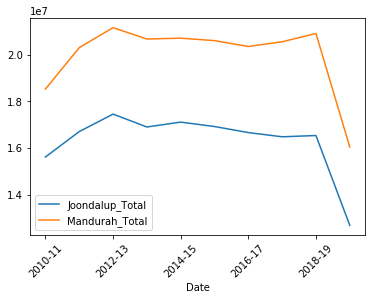

In [177]:
LGA_Total.plot(x="Date",y=["Joondalup_Total","Mandurah_Total"],rot=45)

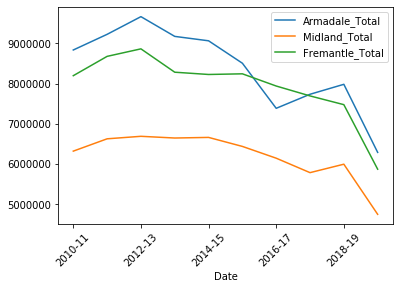

In [178]:
LGA_Total.plot(x="Date",y=["Armadale_Total","Midland_Total","Fremantle_Total"],rot=45)

In [4]:
#Prove that seasonal difference doesn't matter?

In [9]:
Demographics_df

,ï»¿Train_Line,LGA,Category,2011,2012,2013,2014,2015,2016,2017,2018
0,Armadale,Armadale,Total_Pop,NaN,NaN,72662.0,75559.0,78848.0,82021,84669.0,87634.0
1,Armadale,Armadale,Working_Pop,NaN,NaN,49409.0,51096.0,52979.0,54628,56016.0,57532.0
2,Armadale,Armadale,Nr_Businesses,NaN,NaN,NaN,3962.0,4133.0,4342,4578.0,4756.0
3,Armadale,Armadale,Nr_Cars,NaN,NaN,25908.0,26979.0,27322.0,26936,26559.0,26295.0
4,Armadale,Armadale,Unemployed,1706.0,NaN,NaN,NaN,NaN,3655,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
125,GreaterPerth,Perth Metro,Working_force,900491.0,NaN,NaN,NaN,NaN,1001678,NaN,NaN
126,GreaterPerth,Perth Metro,Work_Train,24099.0,NaN,NaN,NaN,NaN,25725,NaN,NaN
127,GreaterPerth,Perth Metro,Work_Bus,30600.0,NaN,NaN,NaN,NaN,34063,NaN,NaN
128,GreaterPerth,Perth Metro,Work_Car,527160.0,NaN,NaN,NaN,NaN,590114,NaN,NaN


In [32]:
Total_Pop_df = Demographics_df[Demographics_df["Category"]=="Total_Pop"].sort_index(ascending=False)

Total_Pop_df.rename(columns = {'ï»¿Train_Line':'Train_line'}, inplace = True)

Total_Pop_df

#sum each year per line e.g. Armadale, Joondalup etc compare changes through graphs. Maybe doing this as well for workforce numbers

# Also compare variations of pop, workforce with variations of transports



,Train_line,LGA,Category,2011,2012,2013,2014,2015,2016,2017,2018
120,GreaterPerth,Perth Metro,Total_Pop,NaN,NaN,1943855.0,1973923.0,1998937.0,2019263,2037902.0,2059484.0
110,Mandurah,Mandurah,Total_Pop,NaN,NaN,79292.0,80927.0,82202.0,83322,84196.0,85302.0
100,Mandurah,Rockingham,Total_Pop,NaN,NaN,119300.0,123038.0,126012.0,128992,131003.0,133389.0
90,Mandurah,Kwinana,Total_Pop,NaN,NaN,34707.0,36444.0,38153.0,40058,41849.0,43511.0
80,Mandurah,Cockburn,Total_Pop,NaN,NaN,102787.0,104906.0,106802.0,108302,110110.0,112165.0
70,Mandurah,Melville,Total_Pop,NaN,NaN,104319.0,104073.0,103522.0,102342,102076.0,101940.0
60,Joondalup,Wanneroo,Total_Pop,NaN,NaN,87969.0,90723.0,93666.0,96833,98901.0,100938.0
50,Joondalup,Joondalup,Total_Pop,NaN,NaN,81715.0,81499.0,81135.0,80288,79771.0,79572.0
40,Joondalup,Stirling,Total_Pop,NaN,NaN,218043.0,219372.0,220152.0,220073,219842.0,220249.0
30,Armadale,Victoria_Park,Total_Pop,NaN,NaN,36260.0,36570.0,36714.0,36647,36503.0,36601.0


In [ ]:
#show train preferences, car preferences in percentage of population